In [1]:
import numpy as np
import pandas as pd
import sqlite3

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
conn = sqlite3.connect(r'C:/Users/diper/Documents/Github/NBA-Prediction-Modeling/data/NBA-Boxscore-Database.sqlite')

In [3]:
query = 'SELECT * from game_info'
game_info = pd.read_sql(query, con=conn)
# account for team name change following the 2013-2014 season
game_info['away_team'].replace('CHA', 'CHO', inplace=True)
game_info['home_team'].replace('CHA', 'CHO', inplace=True)
game_info

,game_id,season,date,away_team,away_score,home_team,home_score,result
0,131410290001,1314,2013-10-29,ORL,87,IND,97,1
1,131410290002,1314,2013-10-29,CHI,95,MIA,107,1
2,131410290003,1314,2013-10-29,LAC,103,LAL,116,1
3,131410300004,1314,2013-10-30,BRK,94,CLE,98,1
4,131410300005,1314,2013-10-30,BOS,87,TOR,93,1
...,...,...,...,...,...,...,...,...
11974,222304091226,2223,2023-04-09,UTA,117,LAL,128,1
11975,222304091227,2223,2023-04-09,NOP,108,MIN,113,1
11976,222304091228,2223,2023-04-09,MEM,100,OKC,115,1
11977,222304091229,2223,2023-04-09,LAC,119,PHO,114,0


In [4]:
query = 'SELECT * from team_stats'
team_stats = pd.read_sql(query, con=conn)
# account for team name change following the 2013-2014 season
team_stats['team'].replace('CHA', 'CHO', inplace=True)
team_stats

,game_id,team,MP,FG,FGA,FGp,3P,3PA,3Pp,FT,FTA,FTp,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PM,TSp,eFGp,3PAr,FTr,ORBp,DRBp,TRBp,ASTp,STLp,BLKp,TOVp,USGp,ORtg,DRtg,BPM
0,131410290001,ORL,240,36.0,93.0,0.387,9.0,19.0,0.474,6.0,10.0,0.600,13.0,26.0,39.0,17.0,10.0,6.0,17.0,26.0,87.0,None,0.447,0.435,0.204,0.108,27.7,72.2,47.0,47.2,10.5,11.1,14.9,100.0,91.6,102.1,None
1,131410290001,IND,240,34.0,71.0,0.479,7.0,17.0,0.412,22.0,32.0,0.688,10.0,34.0,44.0,17.0,4.0,18.0,20.0,13.0,97.0,None,0.570,0.528,0.239,0.451,27.8,72.3,53.0,50.0,4.2,24.3,19.0,100.0,102.1,91.6,None
2,131410290002,CHI,240,35.0,83.0,0.422,7.0,26.0,0.269,18.0,23.0,0.783,11.0,30.0,41.0,23.0,11.0,4.0,18.0,27.0,95.0,None,0.510,0.464,0.313,0.277,23.9,85.7,50.6,65.7,11.3,7.7,16.2,100.0,97.9,110.2,None
3,131410290002,MIA,240,37.0,72.0,0.514,11.0,20.0,0.550,22.0,29.0,0.759,5.0,35.0,40.0,26.0,10.0,7.0,18.0,21.0,107.0,None,0.631,0.590,0.278,0.403,14.3,76.1,49.4,70.3,10.3,12.3,17.5,100.0,110.2,97.9,None
4,131410290003,LAC,240,41.0,83.0,0.494,8.0,21.0,0.381,13.0,23.0,0.565,10.0,30.0,40.0,27.0,11.0,4.0,16.0,21.0,103.0,None,0.553,0.542,0.253,0.277,22.7,62.5,43.5,65.9,11.0,6.3,14.7,100.0,102.6,115.6,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23953,222304091228,OKC,240,45.0,90.0,0.500,12.0,36.0,0.333,13.0,16.0,0.813,8.0,41.0,49.0,30.0,5.0,2.0,14.0,17.0,115.0,None,0.593,0.567,0.400,0.178,20.0,78.8,53.3,66.7,5.0,3.6,12.6,100.0,114.9,99.9,None
23954,222304091229,LAC,240,49.0,100.0,0.490,5.0,23.0,0.217,16.0,24.0,0.667,14.0,39.0,53.0,22.0,3.0,5.0,10.0,18.0,119.0,None,0.538,0.515,0.230,0.240,28.6,76.5,53.0,44.9,2.9,8.1,8.3,100.0,116.4,111.5,None
23955,222304091229,PHO,240,42.0,99.0,0.424,14.0,37.0,0.378,16.0,22.0,0.727,12.0,35.0,47.0,29.0,4.0,3.0,7.0,21.0,114.0,None,0.524,0.495,0.374,0.222,23.5,71.4,47.0,69.0,3.9,3.9,6.1,100.0,111.5,116.4,None
23956,222304091230,GSW,240,58.0,96.0,0.604,27.0,49.0,0.551,14.0,16.0,0.875,9.0,49.0,58.0,47.0,13.0,6.0,15.0,18.0,157.0,None,0.762,0.745,0.510,0.167,27.3,89.1,65.9,81.0,11.9,10.0,12.7,100.0,143.9,92.6,None


In [5]:
query = 'SELECT * from player_stats'
player_stats = pd.read_sql(query, con=conn)
# account for team name change following the 2013-2014 season
player_stats['team'].replace('CHA', 'CHO', inplace=True)
player_stats

,game_id,player,team,MP,FG,FGA,FGp,3P,3PA,3Pp,FT,FTA,FTp,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PM,TSp,eFGp,3PAr,FTr,ORBp,DRBp,TRBp,ASTp,STLp,BLKp,TOVp,USGp,ORtg,DRtg,BPM,PIE
0,131410290001,Arron Afflalo,ORL,32:59,3.0,14.0,0.214,1.0,5.0,0.200,2.0,3.0,0.667,1.0,2.0,3.0,1.0,0.0,0.0,1.0,1.0,9.0,-14.0,0.294,0.250,0.357,0.214,3.1,8.1,5.3,4.6,0.0,0.0,6.1,20.8,69.0,111.0,-9.9,-1.1
1,131410290001,Nikola Vučević,ORL,30:39,4.0,11.0,0.364,0.0,0.0,NaN,0.0,0.0,NaN,5.0,5.0,10.0,3.0,2.0,1.0,5.0,4.0,8.0,-22.0,0.364,0.364,0.000,0.000,16.7,21.8,18.9,15.8,3.3,2.9,31.3,21.9,70.0,98.0,-5.4,3.8
2,131410290001,Jameer Nelson,ORL,30:34,4.0,13.0,0.308,3.0,7.0,0.429,1.0,1.0,1.000,1.0,4.0,5.0,7.0,2.0,0.0,2.0,1.0,12.0,-11.0,0.446,0.423,0.538,0.077,3.3,17.4,9.5,37.0,3.3,0.0,13.0,21.2,102.0,101.0,5.9,10.3
3,131410290001,Jason Maxiell,ORL,26:19,0.0,5.0,0.000,0.0,0.0,NaN,0.0,0.0,NaN,1.0,4.0,5.0,0.0,1.0,2.0,2.0,2.0,0.0,-15.0,0.000,0.000,0.000,0.000,3.9,20.3,11.0,0.0,1.9,6.8,28.6,11.2,8.0,99.0,-10.6,-1.9
4,131410290001,Maurice Harkless,ORL,23:30,6.0,13.0,0.462,2.0,2.0,1.000,0.0,1.0,0.000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,14.0,-3.0,0.521,0.538,0.154,0.077,4.3,0.0,2.5,0.0,2.2,0.0,0.0,24.0,111.0,107.0,2.4,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305727,222304091230,John Butler,POR,22:01,1.0,5.0,0.200,1.0,3.0,0.333,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,-37.0,0.300,0.300,0.600,0.000,0.0,6.6,2.5,0.0,0.0,0.0,0.0,9.1,58.0,149.0,-14.6,-0.7
305728,222304091230,Chance Comanche,POR,20:47,3.0,5.0,0.600,0.0,0.0,NaN,1.0,4.0,0.250,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,7.0,-29.0,0.518,0.600,0.000,0.800,8.4,7.0,7.9,0.0,0.0,4.9,0.0,13.1,110.0,146.0,-7.6,1.7
305729,222304091230,Jabari Walker,POR,20:44,4.0,6.0,0.667,0.0,2.0,0.000,1.0,2.0,0.500,0.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,9.0,-29.0,0.654,0.667,0.333,0.333,0.0,21.0,7.9,0.0,0.0,0.0,22.5,17.2,89.0,147.0,-9.8,2.6
305730,222304091230,Drew Eubanks,POR,Did Not Dress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def calc_player_averages(current_player_stats, n_games, roster):
    '''
    Takes a list of player names and calculates the player averages over past n number of games.
    
    Input:
    current_player_stats: a dataframe with game stats for all current players in roster
    n_games: the number of past games to include when averaging
    roster: list of player names
    
    Output: a dataframe with all player averages
    '''
    
    curr_ps = current_player_stats
    team_past_n_games_df = pd.DataFrame(columns=avg_columns)
    
    for player in roster:
        
        player_df = curr_ps[curr_ps['player'] == player].reset_index(drop=True)

        p_idx = player_df.index[player_df['game_id'] == gid].tolist()[0]
        past_n_games = player_df.loc[(p_idx-n_games):(p_idx-1)]

        name = player_df['player'].iloc[p_idx]
        team = player_df['team'].iloc[p_idx]

        FG_avg = past_n_games['FG'].mean()
        FGA_avg = past_n_games['FGA'].mean()
        FGp_avg = FG_avg/FGA_avg
        _3P_avg = past_n_games['3P'].mean()
        _3PA_avg = past_n_games['3PA'].mean()
        _3Pp_avg = _3P_avg/_3PA_avg
        FT_avg = past_n_games['FT'].mean()
        FTA_avg = past_n_games['FTA'].mean()
        FTp_avg = FT_avg/FTA_avg
        ORB_avg = past_n_games['ORB'].mean()
        DRB_avg = past_n_games['DRB'].mean()
        TRB_avg = past_n_games['TRB'].mean()
        AST_avg = past_n_games['AST'].mean()
        STL_avg = past_n_games['STL'].mean()
        BLK_avg = past_n_games['BLK'].mean()
        TOV_avg = past_n_games['TOV'].mean()
        PF_avg = past_n_games['PF'].mean()
        PTS_avg = past_n_games['PTS'].mean()
        PM_avg = past_n_games['PM'].mean()
        TSp_avg = PTS_avg / (2*(FGA_avg + (0.44*FTA_avg)))
        _2P_avg = FG_avg - _3P_avg
        eFGp_avg = (_2P_avg + 1.5*_3P_avg) / FGA_avg
        _3PAr_avg = _3PA_avg / FGA_avg
        FTr_avg = FTA_avg / FGA_avg
        ORBp_avg = past_n_games['ORBp'].mean()
        DRBp_avg = past_n_games['DRBp'].mean()
        TRBp_avg = past_n_games['TRBp'].mean()
        ASTp_avg = past_n_games['ASTp'].mean()
        STLp_avg = past_n_games['STLp'].mean()
        BLKp_avg = past_n_games['BLKp'].mean()
        TOVp_avg = past_n_games['TOVp'].mean()
        USGp_avg = past_n_games['USGp'].mean()
        PIE_avg = past_n_games['PIE'].mean()

        t_idx = team_past_n_games_df.shape[0]
        team_past_n_games_df.loc[t_idx] = [name, team, FG_avg, FGA_avg, FGp_avg, _3P_avg, _3PA_avg, _3Pp_avg, FT_avg, FTA_avg, FTp_avg,
                                           ORB_avg, DRB_avg, TRB_avg, AST_avg, STL_avg, BLK_avg, TOV_avg, PF_avg, PTS_avg, PM_avg,
                                           TSp_avg, eFGp_avg, _3PAr_avg, FTr_avg, ORBp_avg, DRBp_avg, TRBp_avg, ASTp_avg, STLp_avg,
                                           BLKp_avg, TOVp_avg, USGp_avg, PIE_avg]
        
    return team_past_n_games_df

In [7]:
def calc_team_totals(player_avgs_df, n_games, a_h):
    
    team_past_n_games_df = player_avgs_df
    
    if a_h == 'away':
        team_sum_df = pd.DataFrame(columns= a_avg_columns)
    if a_h == 'home':
        team_sum_df = pd.DataFrame(columns= h_avg_columns)

    team = team_past_n_games_df['team'].iloc[0]
    FG_avg = team_past_n_games_df['FG'].sum()
    FGA_avg = team_past_n_games_df['FGA'].sum()
    FGp_avg = FG_avg/FGA_avg
    _3P_avg = team_past_n_games_df['3P'].sum()
    _3PA_avg = team_past_n_games_df['3PA'].sum()
    _3Pp_avg = _3P_avg/_3PA_avg
    FT_avg = team_past_n_games_df['FT'].sum()
    FTA_avg = team_past_n_games_df['FTA'].sum()
    FTp_avg = FT_avg/FTA_avg
    ORB_avg = team_past_n_games_df['ORB'].sum()
    DRB_avg = team_past_n_games_df['DRB'].sum()
    TRB_avg = team_past_n_games_df['TRB'].sum()
    AST_avg = team_past_n_games_df['AST'].sum()
    STL_avg = team_past_n_games_df['STL'].sum()
    BLK_avg = team_past_n_games_df['BLK'].sum()
    TOV_avg = team_past_n_games_df['TOV'].sum()
    PF_avg = team_past_n_games_df['PF'].sum()
    PTS_avg = team_past_n_games_df['PTS'].sum()
    PM_avg = team_past_n_games_df['PM'].sum()
    TSp_avg = PTS_avg / (2*(FGA_avg + (0.44*FTA_avg)))
    _2P_avg = FG_avg - _3P_avg
    eFGp_avg = (_2P_avg + 1.5*_3P_avg) / FGA_avg
    _3PAr_avg = _3PA_avg / FGA_avg
    FTr_avg = FTA_avg / FGA_avg
    ORBp_avg = team_past_n_games_df['ORBp'].mean() # * 5
    DRBp_avg = team_past_n_games_df['DRBp'].mean() # * 5
    TRBp_avg = team_past_n_games_df['TRBp'].mean() # * 5
    ASTp_avg = team_past_n_games_df['ASTp'].mean() # * 5
    STLp_avg = team_past_n_games_df['STLp'].mean() # * 5
    BLKp_avg = team_past_n_games_df['BLKp'].mean() # * 5
    TOVp_avg = team_past_n_games_df['TOVp'].mean() # * 5
    USGp_avg = team_past_n_games_df['USGp'].mean() # * 5
    PIE_avg = team_past_n_games_df['PIE'].sum()
    
    ts_idx = team_sum_df.shape[0]
    team_sum_df.loc[ts_idx] = [team, FG_avg, FGA_avg, FGp_avg, _3P_avg, _3PA_avg, _3Pp_avg, FT_avg, FTA_avg, FTp_avg,
                               ORB_avg, DRB_avg, TRB_avg, AST_avg, STL_avg, BLK_avg, TOV_avg, PF_avg, PTS_avg, PM_avg,
                               TSp_avg, eFGp_avg, _3PAr_avg, FTr_avg, ORBp_avg, DRBp_avg, TRBp_avg, ASTp_avg, STLp_avg,
                               BLKp_avg, TOVp_avg, USGp_avg, PIE_avg]
    
    return team_sum_df

In [8]:
def record_team_avgs(game_info, away_stats, home_stats, df):
    
    agg_stats = pd.concat([away_stats, home_stats], axis=1)
    
    agg_team_stats = pd.concat([game_info, agg_stats], axis=1)
    
    
#     player_agg_team_stats = game_info.join([away_stats, home_stats], how='outer')
    
    df = df.append(agg_team_stats, ignore_index=True)
    
    return df

In [9]:
game_ids = list(game_info['game_id'].unique())
# game_ids = game_ids[0:40]
# game_ids = [222304091230]
n_past_games = 20

In [10]:
# drop unecessary rows and columns
ps_df = player_stats[player_stats['MP'] != 'Did Not Dress']
ps_df.reset_index(inplace=True, drop=True)
ps_df.drop(['MP', 'ORtg', 'DRtg', 'BPM'], axis=1, inplace=True)

final_away_columns = [f'a_{column}' for column in ps_df.loc[:,'FG':'PIE']]
final_home_columns = [f'h_{column}' for column in ps_df.loc[:,'FG':'PIE']]
final_columns = list(game_info.columns) + final_away_columns + final_home_columns

player_agg_team_stats = pd.DataFrame(columns = final_columns)

In [11]:
for gid in game_ids:
    
    a_team = game_info['away_team'][game_info['game_id'] == gid].values[0]
    h_team = game_info['home_team'][game_info['game_id'] == gid].values[0]
    
    # create list of column names for player/team averages
#     avg_columns = [column for column in ps_df.columns[1:3]] + [f'{column}_avg' for column in ps_df.columns[3:]]
    avg_columns = list(ps_df.columns[1:])
    a_avg_columns = [f'a_{column}' for column in avg_columns[1:]]
    h_avg_columns = [f'h_{column}' for column in avg_columns[1:]]

    # list of active away/home players from current game
    current_a_players = list(ps_df['player'][(ps_df['game_id'] == gid) & (ps_df['team'] == a_team)])
    current_h_players = list(ps_df['player'][(ps_df['game_id'] == gid) & (ps_df['team'] == h_team)])
    
    # current players all past games
    curr_ps_a = ps_df[ps_df['player'].isin(current_a_players)]
    curr_ps_h = ps_df[ps_df['player'].isin(current_h_players)]
    
    away_player_avgs = calc_player_averages(curr_ps_a, n_past_games, current_a_players)
    home_player_avgs = calc_player_averages(curr_ps_h, n_past_games, current_h_players)
    
    away_team_agg = calc_team_totals(away_player_avgs, n_past_games, a_h='away')
    home_team_agg = calc_team_totals(home_player_avgs, n_past_games, a_h='home')
    
    current_game_info = game_info[game_info['game_id'] == gid].reset_index(drop=True)
    
    player_agg_team_stats = record_team_avgs(current_game_info, away_team_agg, home_team_agg, player_agg_team_stats)

In [12]:
player_agg_team_stats

,game_id,season,date,away_team,away_score,home_team,home_score,result,a_FG,a_FGA,a_FGp,a_3P,a_3PA,a_3Pp,a_FT,a_FTA,a_FTp,a_ORB,a_DRB,a_TRB,a_AST,a_STL,a_BLK,a_TOV,a_PF,a_PTS,a_PM,a_TSp,a_eFGp,a_3PAr,a_FTr,a_ORBp,a_DRBp,a_TRBp,a_ASTp,a_STLp,a_BLKp,a_TOVp,a_USGp,a_PIE,h_FG,h_FGA,h_FGp,h_3P,h_3PA,h_3Pp,h_FT,h_FTA,h_FTp,h_ORB,h_DRB,h_TRB,h_AST,h_STL,h_BLK,h_TOV,h_PF,h_PTS,h_PM,h_TSp,h_eFGp,h_3PAr,h_FTr,h_ORBp,h_DRBp,h_TRBp,h_ASTp,h_STLp,h_BLKp,h_TOVp,h_USGp,h_PIE,a_team,h_team
0,131410290001,1314,2013-10-29,ORL,87,IND,97,1,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,ORL,IND
1,131410290002,1314,2013-10-29,CHI,95,MIA,107,1,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,CHI,MIA
2,131410290003,1314,2013-10-29,LAC,103,LAL,116,1,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,LAC,LAL
3,131410300004,1314,2013-10-30,BRK,94,CLE,98,1,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,BRK,CLE
4,131410300005,1314,2013-10-30,BOS,87,TOR,93,1,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,BOS,TOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,222304091226,2223,2023-04-09,UTA,117,LAL,128,1,28.749506,60.769136,0.473094,8.916783,25.287139,0.352621,11.630745,14.778297,0.787015,7.537530,29.319180,36.856710,18.273698,4.445083,3.193875,10.739050,17.191002,78.046540,-22.454296,0.580085,0.546460,0.416118,0.243188,4.431251,15.999330,10.382187,11.613577,1.150122,1.525503,15.309402,15.682231,33.201601,50.970574,104.799203,0.486364,15.143301,40.550797,0.373440,25.083732,32.803748,0.764661,12.612201,44.911962,57.524163,29.061483,6.949920,6.029346,16.047129,19.347608,142.168182,22.070441,0.596179,0.558613,0.386938,0.313015,5.353429,15.879335,10.875661,13.387279,1.286132,1.788414,10.809413,18.492862,64.925774,UTA,LAL
11975,222304091227,2223,2023-04-09,NOP,108,MIN,113,1,47.081579,97.094366,0.484905,13.055702,32.244366,0.404899,21.105061,25.877834,0.815

In [13]:
player_agg_team_stats.to_csv('player_full_20.csv')

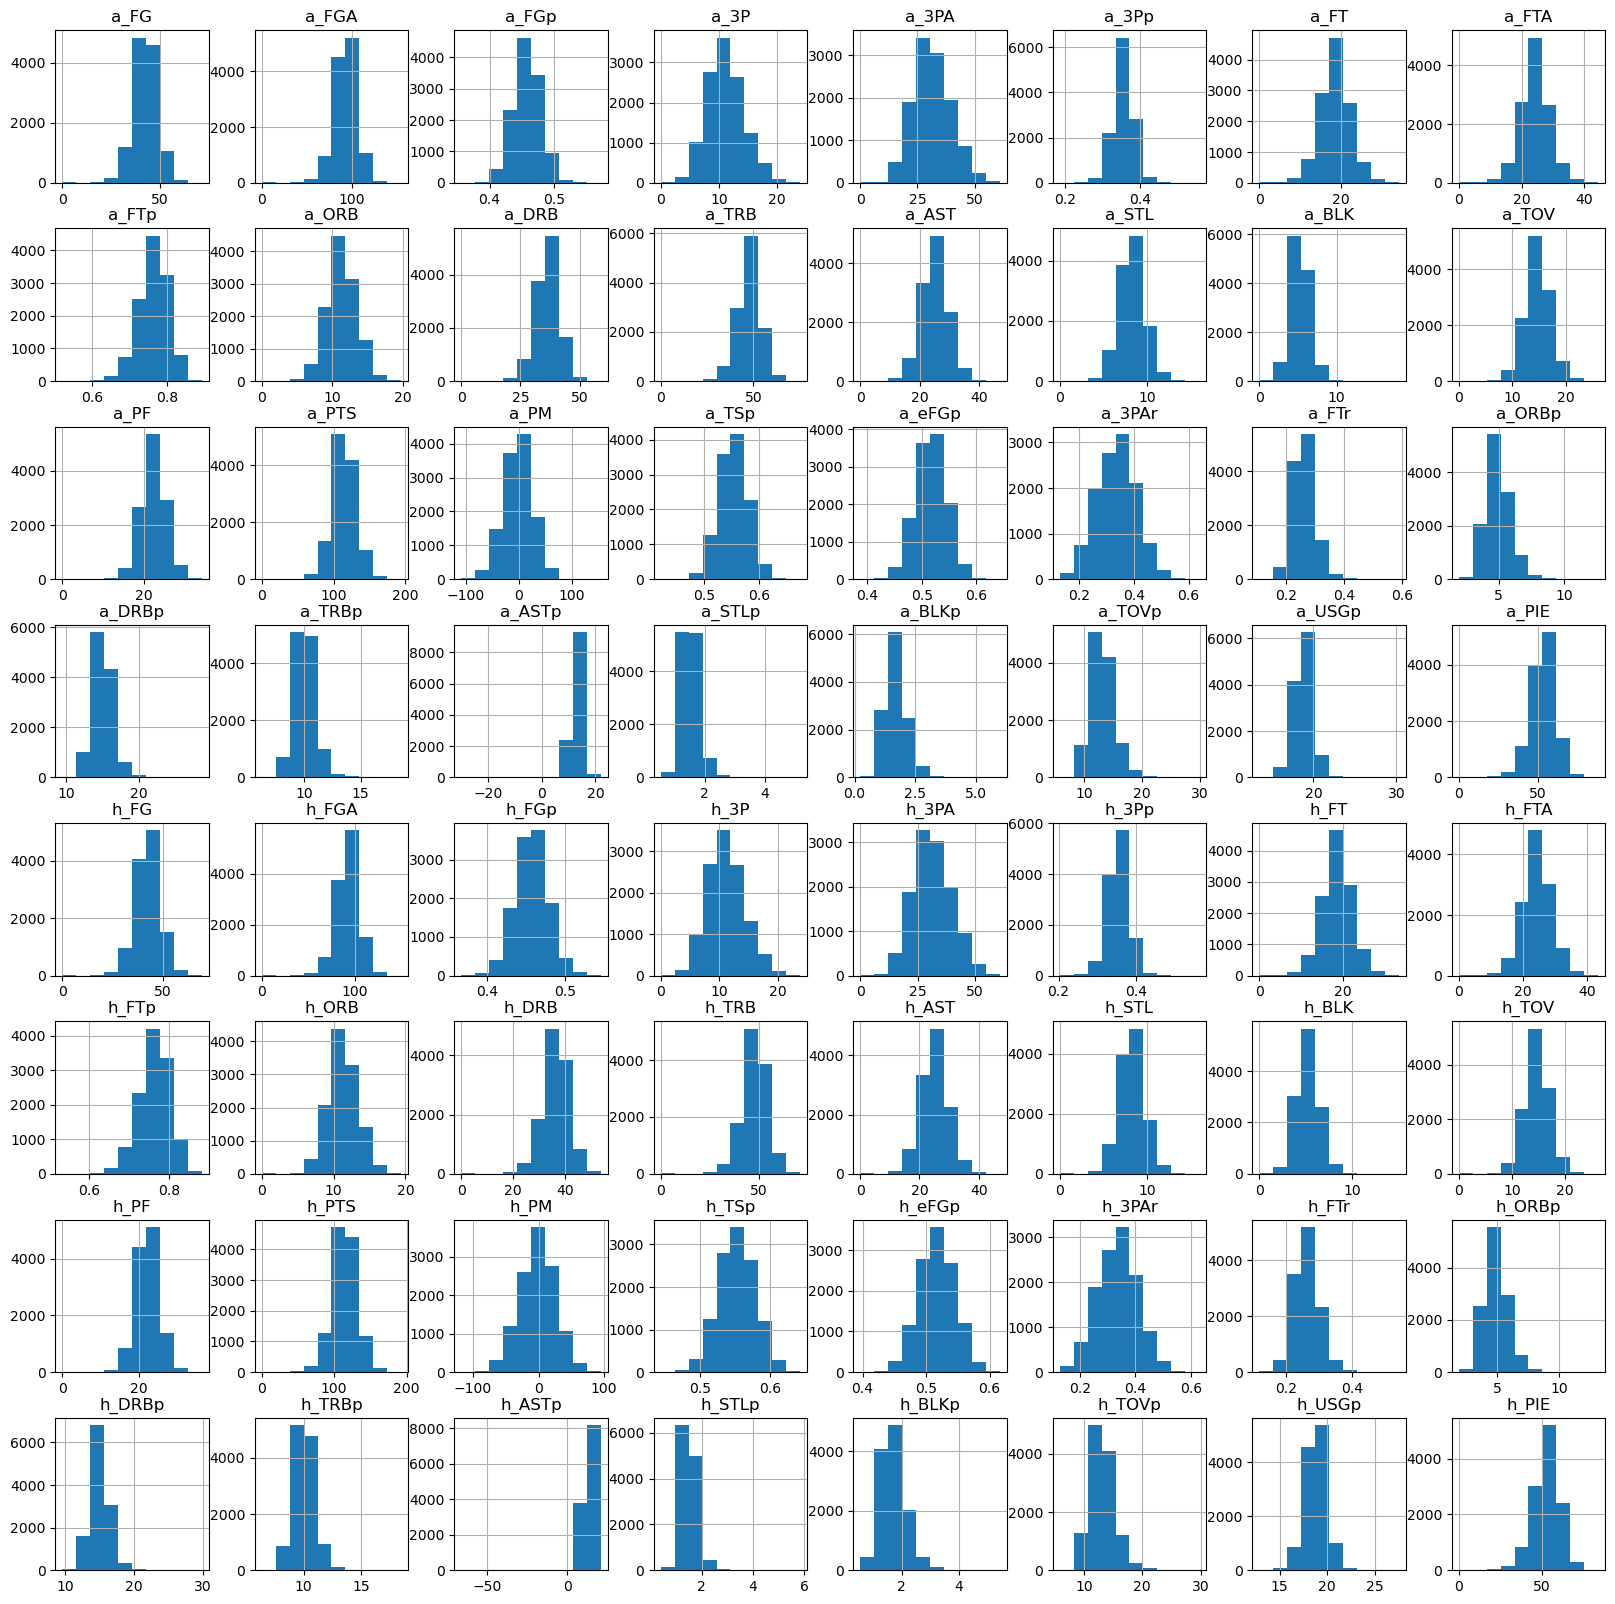

In [17]:
p_20 = player_agg_team_stats
p_20.hist(figsize=(20,20));

In [18]:
p_20.describe()

,a_FG,a_FGA,a_FGp,a_3P,a_3PA,a_3Pp,a_FT,a_FTA,a_FTp,a_ORB,a_DRB,a_TRB,a_AST,a_STL,a_BLK,a_TOV,a_PF,a_PTS,a_PM,a_TSp,a_eFGp,a_3PAr,a_FTr,a_ORBp,a_DRBp,a_TRBp,a_ASTp,a_STLp,a_BLKp,a_TOVp,a_USGp,a_PIE,h_FG,h_FGA,h_FGp,h_3P,h_3PA,h_3Pp,h_FT,h_FTA,h_FTp,h_ORB,h_DRB,h_TRB,h_AST,h_STL,h_BLK,h_TOV,h_PF,h_PTS,h_PM,h_TSp,h_eFGp,h_3PAr,h_FTr,h_ORBp,h_DRBp,h_TRBp,h_ASTp,h_STLp,h_BLKp,h_TOVp,h_USGp,h_PIE
count,11979.000000,11979.000000,11966.000000,11979.000000,11979.000000,11966.000000,11979.000000,11979.000000,11966.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11979.000000,11979.000000,11979.000000,11962.000000,11979.000000,11979.000000,11962.000000,11979.000000,11979.000000,11962.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11979.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11962.000000,11979.000000
mean,42.442246,92.772638,0.457371,11.138985,31.316005,0.354670,18.600033,24.384131,0.762936,11.311559,36.333289,47.644849,25.029720,8.284762,5.263202,14.706539,22.236078,114.623498,-1.282940,0.553412,0.517243,0.336793,0.262998,4.911668,15.037846,10.024676,12.980722,1.501213,1.705994,13.115209,18.783253,53.124415,42.431801,92.795284,0.457062,11.124796,31.318168,0.354122,18.625702,24.408223,0.763056,11.301431,36.297213,47.598644,25.067172,8.276778,5.239294,14.714657,22.209071,114.614113,-1.672908,0.553030,0.516753,0.336237,0.263312,4.918041,15.035421,10.021701,13.023967,1.502208,1.699290,13.114287,18.792292,53.095408
std,6.136047,12.521566,0.021118,3.149148,8.244309,0.027367,3.617216,4.615202,0.038844,2.138180,5.027978,6.392241,4.563801,1.496961,1.217789,2.458640,3.029904,16.936991,27.140715,0.026472,0.028162,0.072068,0.037605,0.967871,1.411289,0.955572,2.180427,0.303355,0.449110,2.190561,1.127555,8.079449,6.263163,12.727473,0.021163,3.201344,8.418755,0.027278,3.622654,4.589835,0.038775,2.128637,5.152105,6.525038,4.613177,1.488402,1.208768,2.433430,3.029161,17.312054,26.980449,0.026583,0.028194,0.071963,0.037324,0.971436,1.397140,0.944494,2.159668,0.300629,0.445632,2.178185,1.134795,8.170893
min,0.000000,0.000000,0.356295,0.000000,0.000000,0.186170,0.000000,0.000000,0.521739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-108.876465,0.420344,0.387365,0.129412,0.107527,1.927273,9.476856,6.221328,-29.860321,0.518182,0.235000,5.724052,13.473286,0.000000,0.000000,0.000000,0.366120,0.000000,0.000000,0.202703,0.000000,0.000000,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-117.656224,0.443487,0.396175,0.127287,0.119752,1.927273,9.586239,6.341528,-66.155649,0.409091,0.537020,5.870000,12.848847,0.000000
25%,38.962358,85.783329,0.443331,8.938527,25.492763,0.337738,16.379009,21.593342,0.738686,9.941019,33.421958,44.005151,22.195059,7.323118,4.422528,13.192518,20.311769,104.825498,-19.144940,0.535618,0.498283,0.284087,0.238025,4.252928,14.148981,9.424991,11.894975,1.304551,1.395116,11.647995,18.089597,48.454155,38.846186,85.671370,0.442954,8.872852,25.345876,0.337102,16.417246,21.630931,0.739170,9.933020,33.262348,43.916108,22.189087,7.305482,4.417694,13.237738,20.300960,104.611554,-19.110360,0.534791,0.497648,0.284010,0.238204,4.252742,14.146227,9.418924,11.915985,1.307308,1.390720,11.634551,18.107749,48.423135
50%,42.575573,93.266868,0.457421,10.942982,30.762121,0.354546,18.604386,24.354943,0.764716,11.230556,36.500855,47.947575,24.959357,8.286854,5.216458,14.710121,22.227778,114.608166,-0.545990,0.553338,0.517373,0.338258,0.260664,4.819902,14.973631,9.958263,13.033422,1.471922,1.649833,12.893916,18.814459,53.643200,42.569456,93.337135,0.457109,10.9458